In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
credit=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Credit%20Default.csv')

In [5]:
credit.head()


,Income,Age,Loan,Loan to Income,Default
0,66155.92510,59.017015,8106.532131,0.122537,0
1,34415.15397,48.117153,6564.745018,0.190752,0
2,57317.17006,63.108049,8020.953296,0.139940,0
3,42709.53420,45.751972,6103.642260,0.142911,0
4,66952.68885,18.584336,8770.099235,0.130990,1


In [6]:
credit. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Income          2000 non-null   float64
 1   Age             2000 non-null   float64
 2   Loan            2000 non-null   float64
 3   Loan to Income  2000 non-null   float64
 4   Default         2000 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 78.2 KB


In [7]:
credit.describe()

,Income,Age,Loan,Loan to Income,Default
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,45331.600018,40.927143,4444.369695,0.098403,0.141500
std,14326.327119,13.262450,3045.410024,0.057620,0.348624
min,20014.489470,18.055189,1.377630,0.000049,0.000000
25%,32796.459720,29.062492,1939.708847,0.047903,0.000000
50%,45789.117310,41.382673,3974.719418,0.099437,0.000000
75%,57791.281670,52.596993,6432.410625,0.147585,0.000000
max,69995.685580,63.971796,13766.051240,0.199938,1.000000


In [8]:
credit.columns

Index(['Income', 'Age', 'Loan', 'Loan to Income', 'Default'], dtype='object')

In [9]:
y=credit['Default']
X=credit[['Income', 'Age', 'Loan', 'Loan to Income']]
X.shape,y.shape

((2000, 4), (2000,))

In [10]:
#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,random_state=2529)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1400, 4), (600, 4), (1400,), (600,))

In [11]:
#select model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [69]:
#training the model
model.fit(X_train,y_train)

LogisticRegression()

In [70]:
#prediction from trained model
y_pred=model.predict(X_test)

In [71]:
# model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# model accuracy
accuracy_score(y_test,y_pred)

0.95

In [72]:
#model confusion matrix
confusion_matrix(y_test,y_pred)

array([[506,  13],
       [ 17,  64]], dtype=int64)

In [73]:
#classifiaction report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       519
           1       0.83      0.79      0.81        81

    accuracy                           0.95       600
   macro avg       0.90      0.88      0.89       600
weighted avg       0.95      0.95      0.95       600



In [74]:
y_test.head()

1317    0
705     0
1881    0
1725    1
1622    0
Name: Default, dtype: int64

Text(0.5, 1.0, ' SIMPLE PLOT')

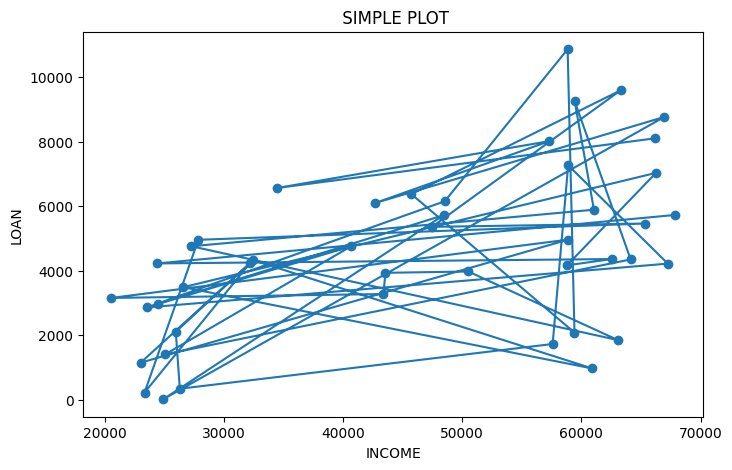

In [92]:
#plot for relation between Income and Loan
df1=credit['Income'].iloc[:45]
df2=credit['Loan'].iloc[:45]

fig = plt.figure(figsize = (8, 5))

plt.plot(df1,df2,marker="o",linestyle="-")
plt.xlabel("INCOME")
plt.ylabel("LOAN")
plt.title(" SIMPLE PLOT")

In [76]:
#correlation between various attributes
(credit.corr())

,Income,Age,Loan,Loan to Income,Default
Income,1.000000,-0.034984,0.441117,-0.019862,0.002284
Age,-0.034984,1.000000,0.006561,0.021588,-0.444765
Loan,0.441117,0.006561,1.000000,0.847495,0.377160
Loan to Income,-0.019862,0.021588,0.847495,1.000000,0.433261
Default,0.002284,-0.444765,0.377160,0.433261,1.000000


Text(0.5, 1.0, ' SIMPLE PLOT 2')

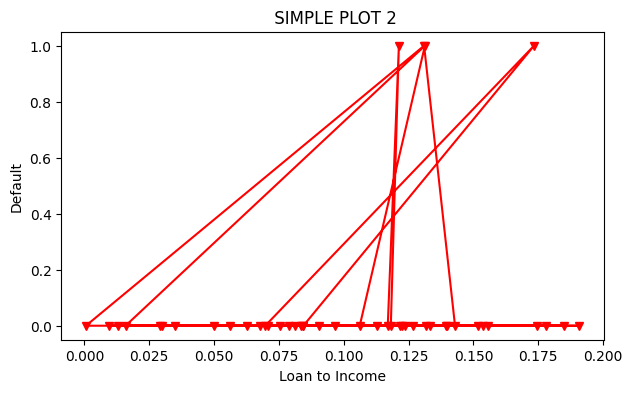

In [88]:
#plot for relation between Loan to Income and Default

df1=credit['Loan to Income'].iloc[:45]
df2=credit['Default'].iloc[:45]

fig = plt.figure(figsize = (7,4))

plt.plot(df1,df2,marker="v",color="r",linestyle="-")
plt.xlabel("Loan to Income")
plt.ylabel("Default")
plt.title(" SIMPLE PLOT 2")

In [86]:
#define X_new
X_new=credit[['Income', 'Age', 'Loan', 'Loan to Income']].loc[1052, :]
X_new

Income            68743.353180
Age                  56.385252
Loan               2290.204289
Loan to Income        0.033315
Name: 1052, dtype: float64

In [79]:
print(credit.loc[1052, :])

Income            68743.353180
Age                  56.385252
Loan               2290.204289
Loan to Income        0.033315
Default               0.000000
Name: 1052, dtype: float64


In [90]:
# predict for X_new
model.predict(X_new.to_numpy().reshape(1,-1))


C:\Users\ANKIT DHAR\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)